In [1]:
import os

style_dir = 'results/mpl_style/physrev_mplstyle/physrev.mplstyle'

from wrappers.orca_wrappers import orca_load
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mace.calculators import MACECalculator

%matplotlib inline
%config InlineBackend.figure_format='retina' 

plt.style.use(style_dir)
plt.rcParams['figure.dpi'] = "300"

/home/physics/phugjr/.local/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.pa

In [2]:
out_dir  = 'report_data/report_data/mace_predics/thymine/interpolated_energies'

state_1 = {}
state_2 = {}
state_0 = {}
raw_mace_1 = {}
raw_mace_2 = {}
sf_mace_1 = {}
sf_mace_2 = {}

raw_mace = 'testing_suite/thymine/models/thymine_raw_compiled.model'
sf_mace = 'testing_suite/thymine/models/thymine_isolated_compiled.model'


zpe = orca_load(f'{out_dir}/state_1_image_0').get_potential_energy()    
for file in os.listdir(out_dir):
    if 'state_0' in file:
        image_num = int(file.split('_')[-1])  # Convert to int for proper sorting
        atoms = orca_load(f'{out_dir}/{file}')
        state_0[image_num] = atoms.get_potential_energy() - zpe

    if 'state_1' in file:
        image_num = int(file.split('_')[-1])  # Convert to int for proper sorting
        atoms = orca_load(f'{out_dir}/{file}')
        state_1[image_num] = atoms.get_potential_energy() -zpe

        raw_calc = MACECalculator(model_paths = raw_mace, device = 'cuda')
        sf_calc = MACECalculator(model_paths = sf_mace, device = 'cuda')

        raw_atoms = atoms.copy()
        raw_atoms.info['head'] = 'spin_flip_es1'
        raw_atoms.calc = raw_calc
        raw_energy = raw_atoms.get_potential_energy() - zpe
        raw_mace_1[image_num] = raw_energy

        sf_atoms = atoms.copy()
        sf_atoms.info['head'] = 'spin_flip_es1'
        sf_atoms.calc = sf_calc
        sf_energy = sf_atoms.get_potential_energy() - zpe
        sf_mace_1[image_num] =sf_energy

    if 'state_2' in file:
        image_num = int(file.split('_')[-1])  # Convert to int for proper sorting
        atoms = orca_load(f'{out_dir}/{file}')
        state_2[image_num] = atoms.get_potential_energy() -zpe

        raw_calc = MACECalculator(model_paths = raw_mace, device = 'cuda')
        sf_calc = MACECalculator(model_paths = sf_mace, device = 'cuda')

        raw_atoms = atoms.copy()
        raw_atoms.info['head'] = 'spin_flip_es2'
        raw_atoms.calc = raw_calc
        raw_energy = raw_atoms.get_potential_energy() - zpe
        raw_mace_2[image_num] = raw_energy

        sf_atoms = atoms.copy()
        sf_atoms.info['head'] = 'spin_flip_es2'
        sf_atoms.calc = sf_calc
        sf_energy = sf_atoms.get_potential_energy() - zpe
        sf_mace_2[image_num] =sf_energy

/home/physics/phugjr/.local/lib/python3.11/site-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=de

No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype

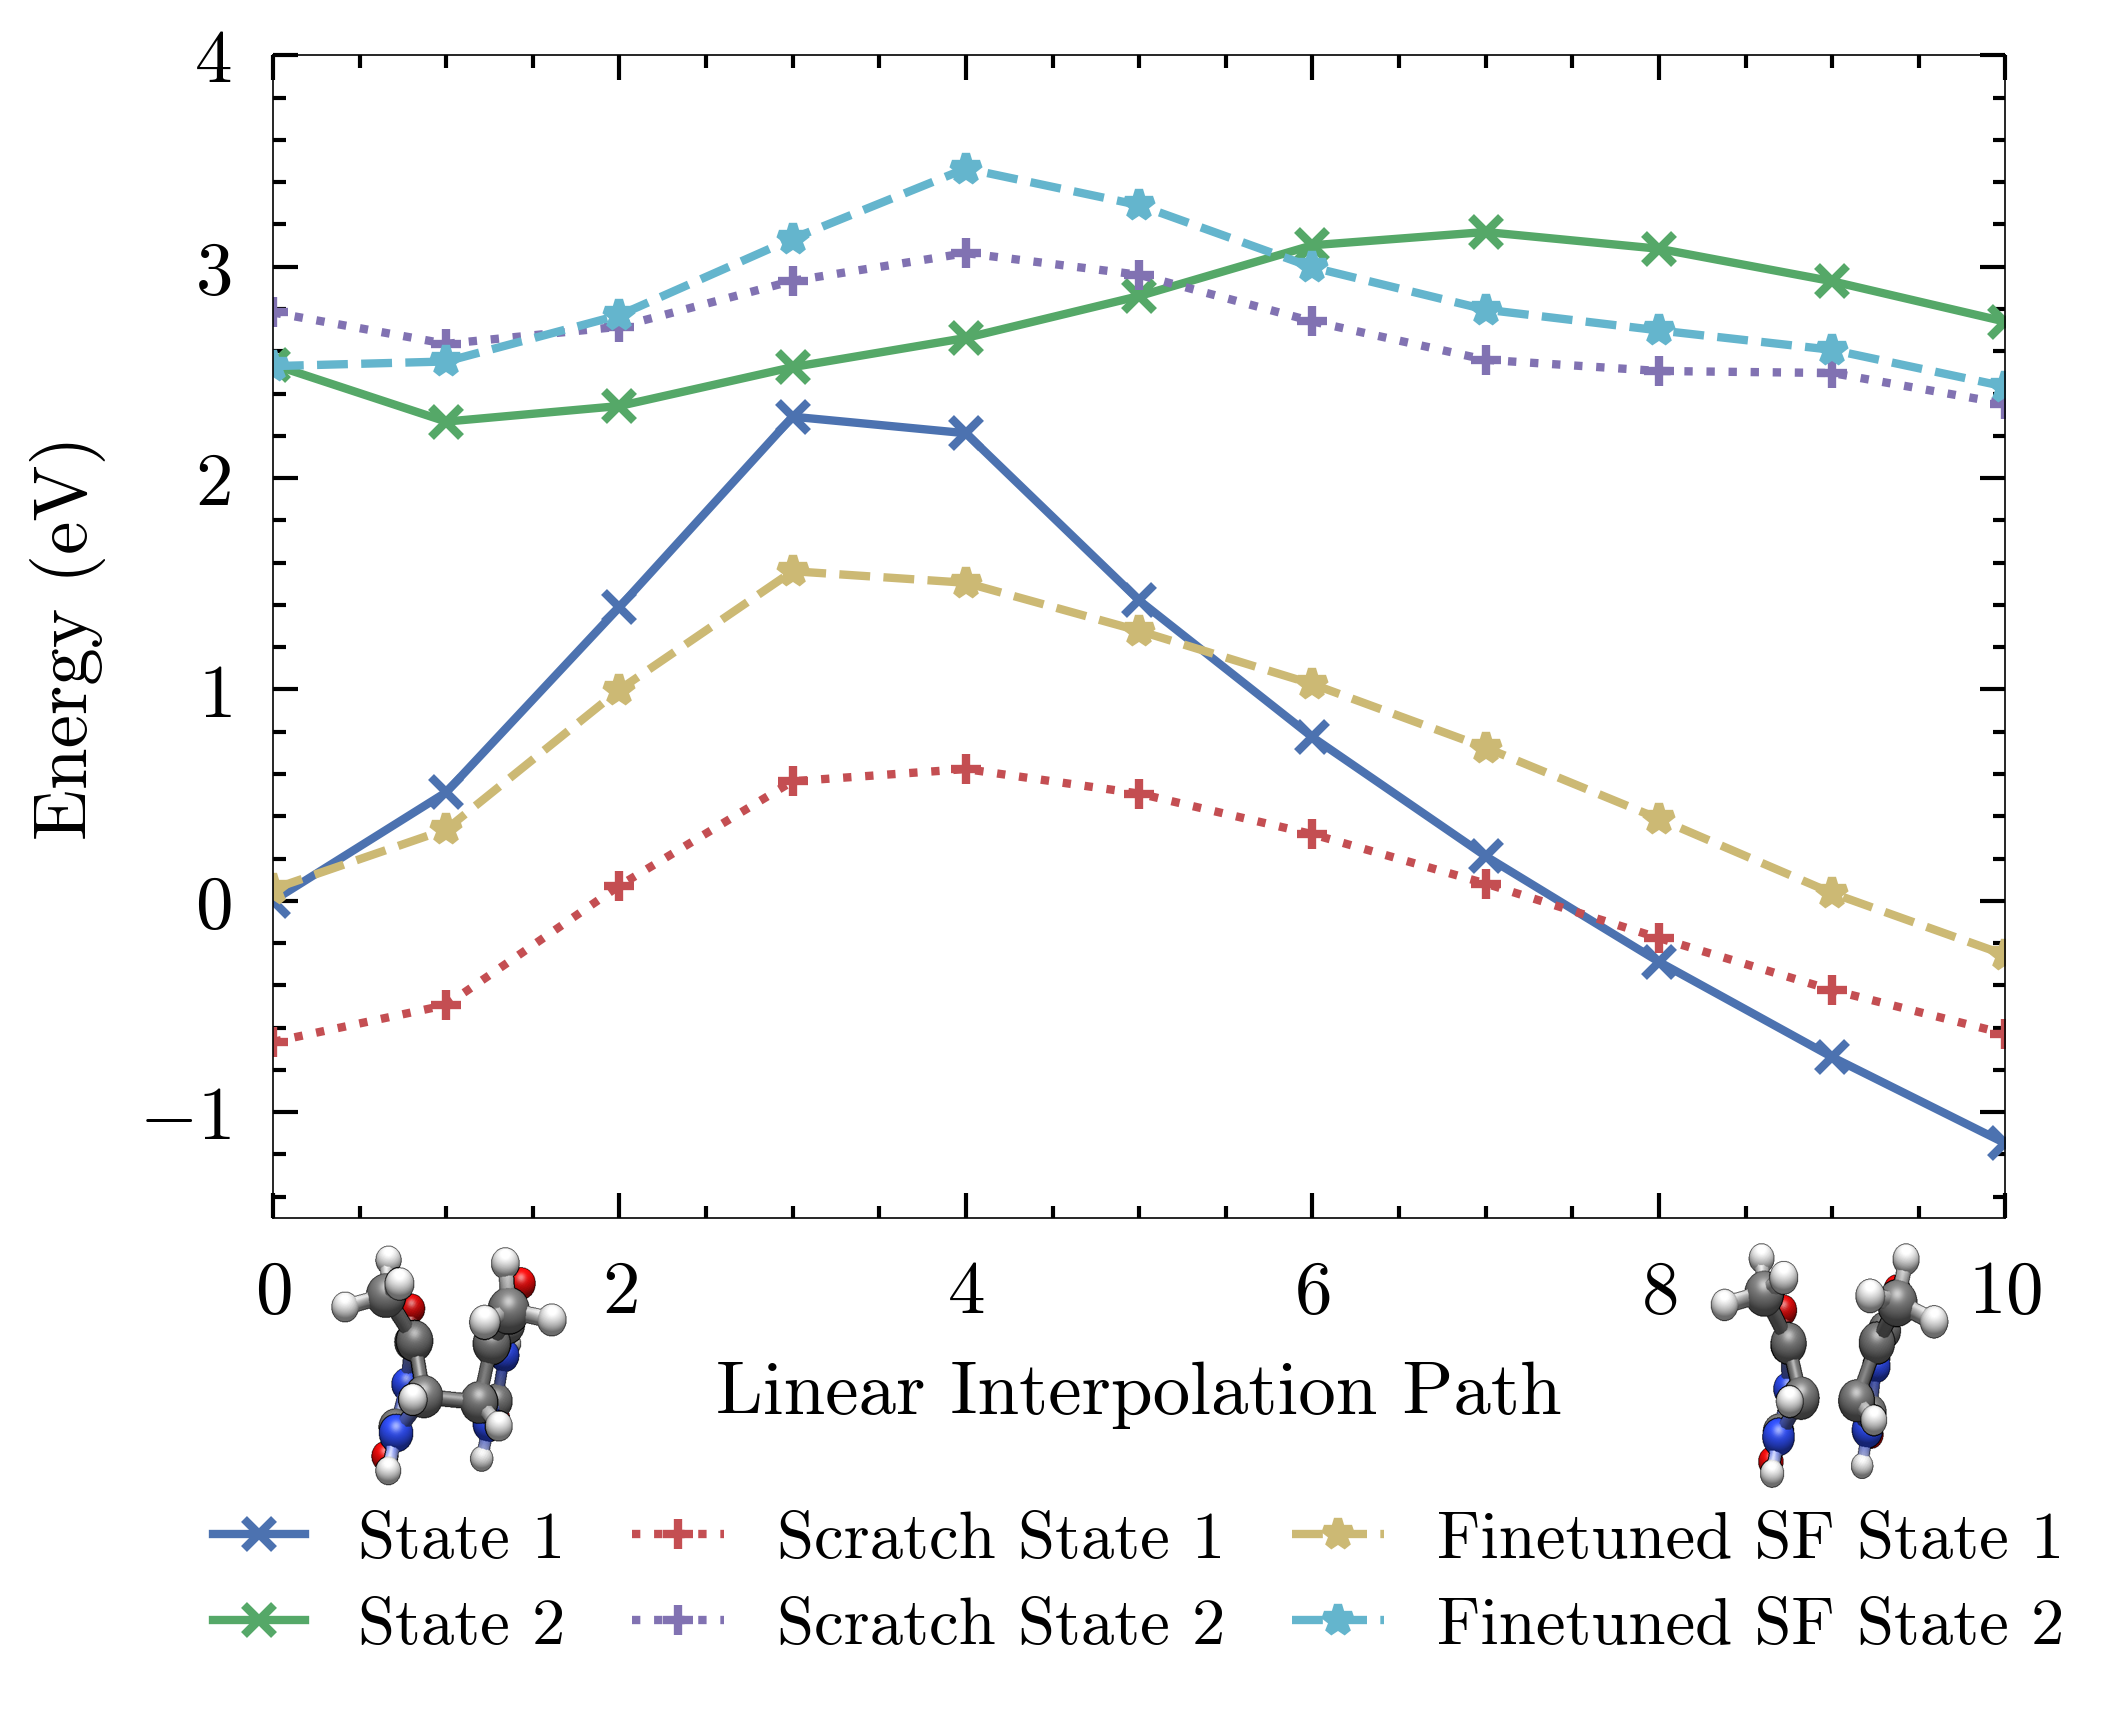

In [5]:

# Sort keys numerically
sorted_keys_1 = sorted(state_1.keys())
sorted_keys_2 = sorted(state_2.keys())

figure = plt.figure(figsize=(3.5, 2.5))
ax = figure.add_subplot(111)
ax.plot(sorted_keys_1, [state_1[k] for k in sorted_keys_1], marker = 'x', label='State 1', lw = 1)
ax.plot(sorted_keys_2, [state_2[k] for k in sorted_keys_2], marker = 'x', label='State 2', lw = 1)

ax.plot(sorted_keys_1, [raw_mace_1[k] for k in sorted_keys_1], marker = '+', ls = ':', label='Scratch State 1', lw = 1)
ax.plot(sorted_keys_2, [raw_mace_2[k] for k in sorted_keys_2], marker = '+', ls = ':', label='Scratch State 2', lw = 1)

ax.plot(sorted_keys_1, [sf_mace_1[k] for k in sorted_keys_1], marker = '*', ls = '--',  label='Finetuned SF State 1', lw = 1)
ax.plot(sorted_keys_2, [sf_mace_2[k] for k in sorted_keys_2], marker = '*', ls = '--', label='Finetuned SF State 2', lw = 1)

ax.set_xlabel('Linear Interpolation Path')
ax.set_ylabel('Energy (eV)')
ax.set_xlim(0, 10) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

thymine_22 = Image.open('report_data/graphs/thymine/3d_thymines/di-thy(2.2,74).png').resize((250, 250))
thymine_22 = np.array(thymine_22)
figure.figimage(thymine_22, 330, 220, zorder=0)

thymine_26 = Image.open('report_data/graphs/thymine/3d_thymines/di-thy(2.6,74).png').resize((250, 250))
thymine_26 = np.array(thymine_26)
figure.figimage(thymine_26, 1710, 220, zorder=0)

ax.set_ylim(-1.5, 4)

plt.show()